# EDA

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
# Load aggregated eICU patient table
patient = pd.read_csv('raw_agg_patient_table.csv')
patient.shape

(17167, 67)

In [3]:
# Convert categorical variables to category 
categorical_cols = ['gender', 'age', 'ethnicity', 'apacheadmissiondx', 
                    'hospitaladmitsource', 'died','unittype', 'unitadmitsource',
                    'unitstaytype', 'intubated','aids', 'vent', 'dialysis',
                    'lymphoma', 'immunosuppression', 'diabetes', 
                    'numbedscategory', 'teachingstatus', 'hospitalregion']

for col in categorical_cols:
    patient[col] = patient[col].astype('category')

### Distribution of numeric variables

In [4]:
patient_num_vars = patient.select_dtypes(include=np.number)
num_vars_to_exclude = ['patientunitstayid', 'patienthealthsystemstayid', 
                       'wardid']
num_cols_to_keep = [col for col in patient_num_vars.columns if 
                    col not in(num_vars_to_exclude)]
patient_num_vars = patient_num_vars.loc[:, num_cols_to_keep]

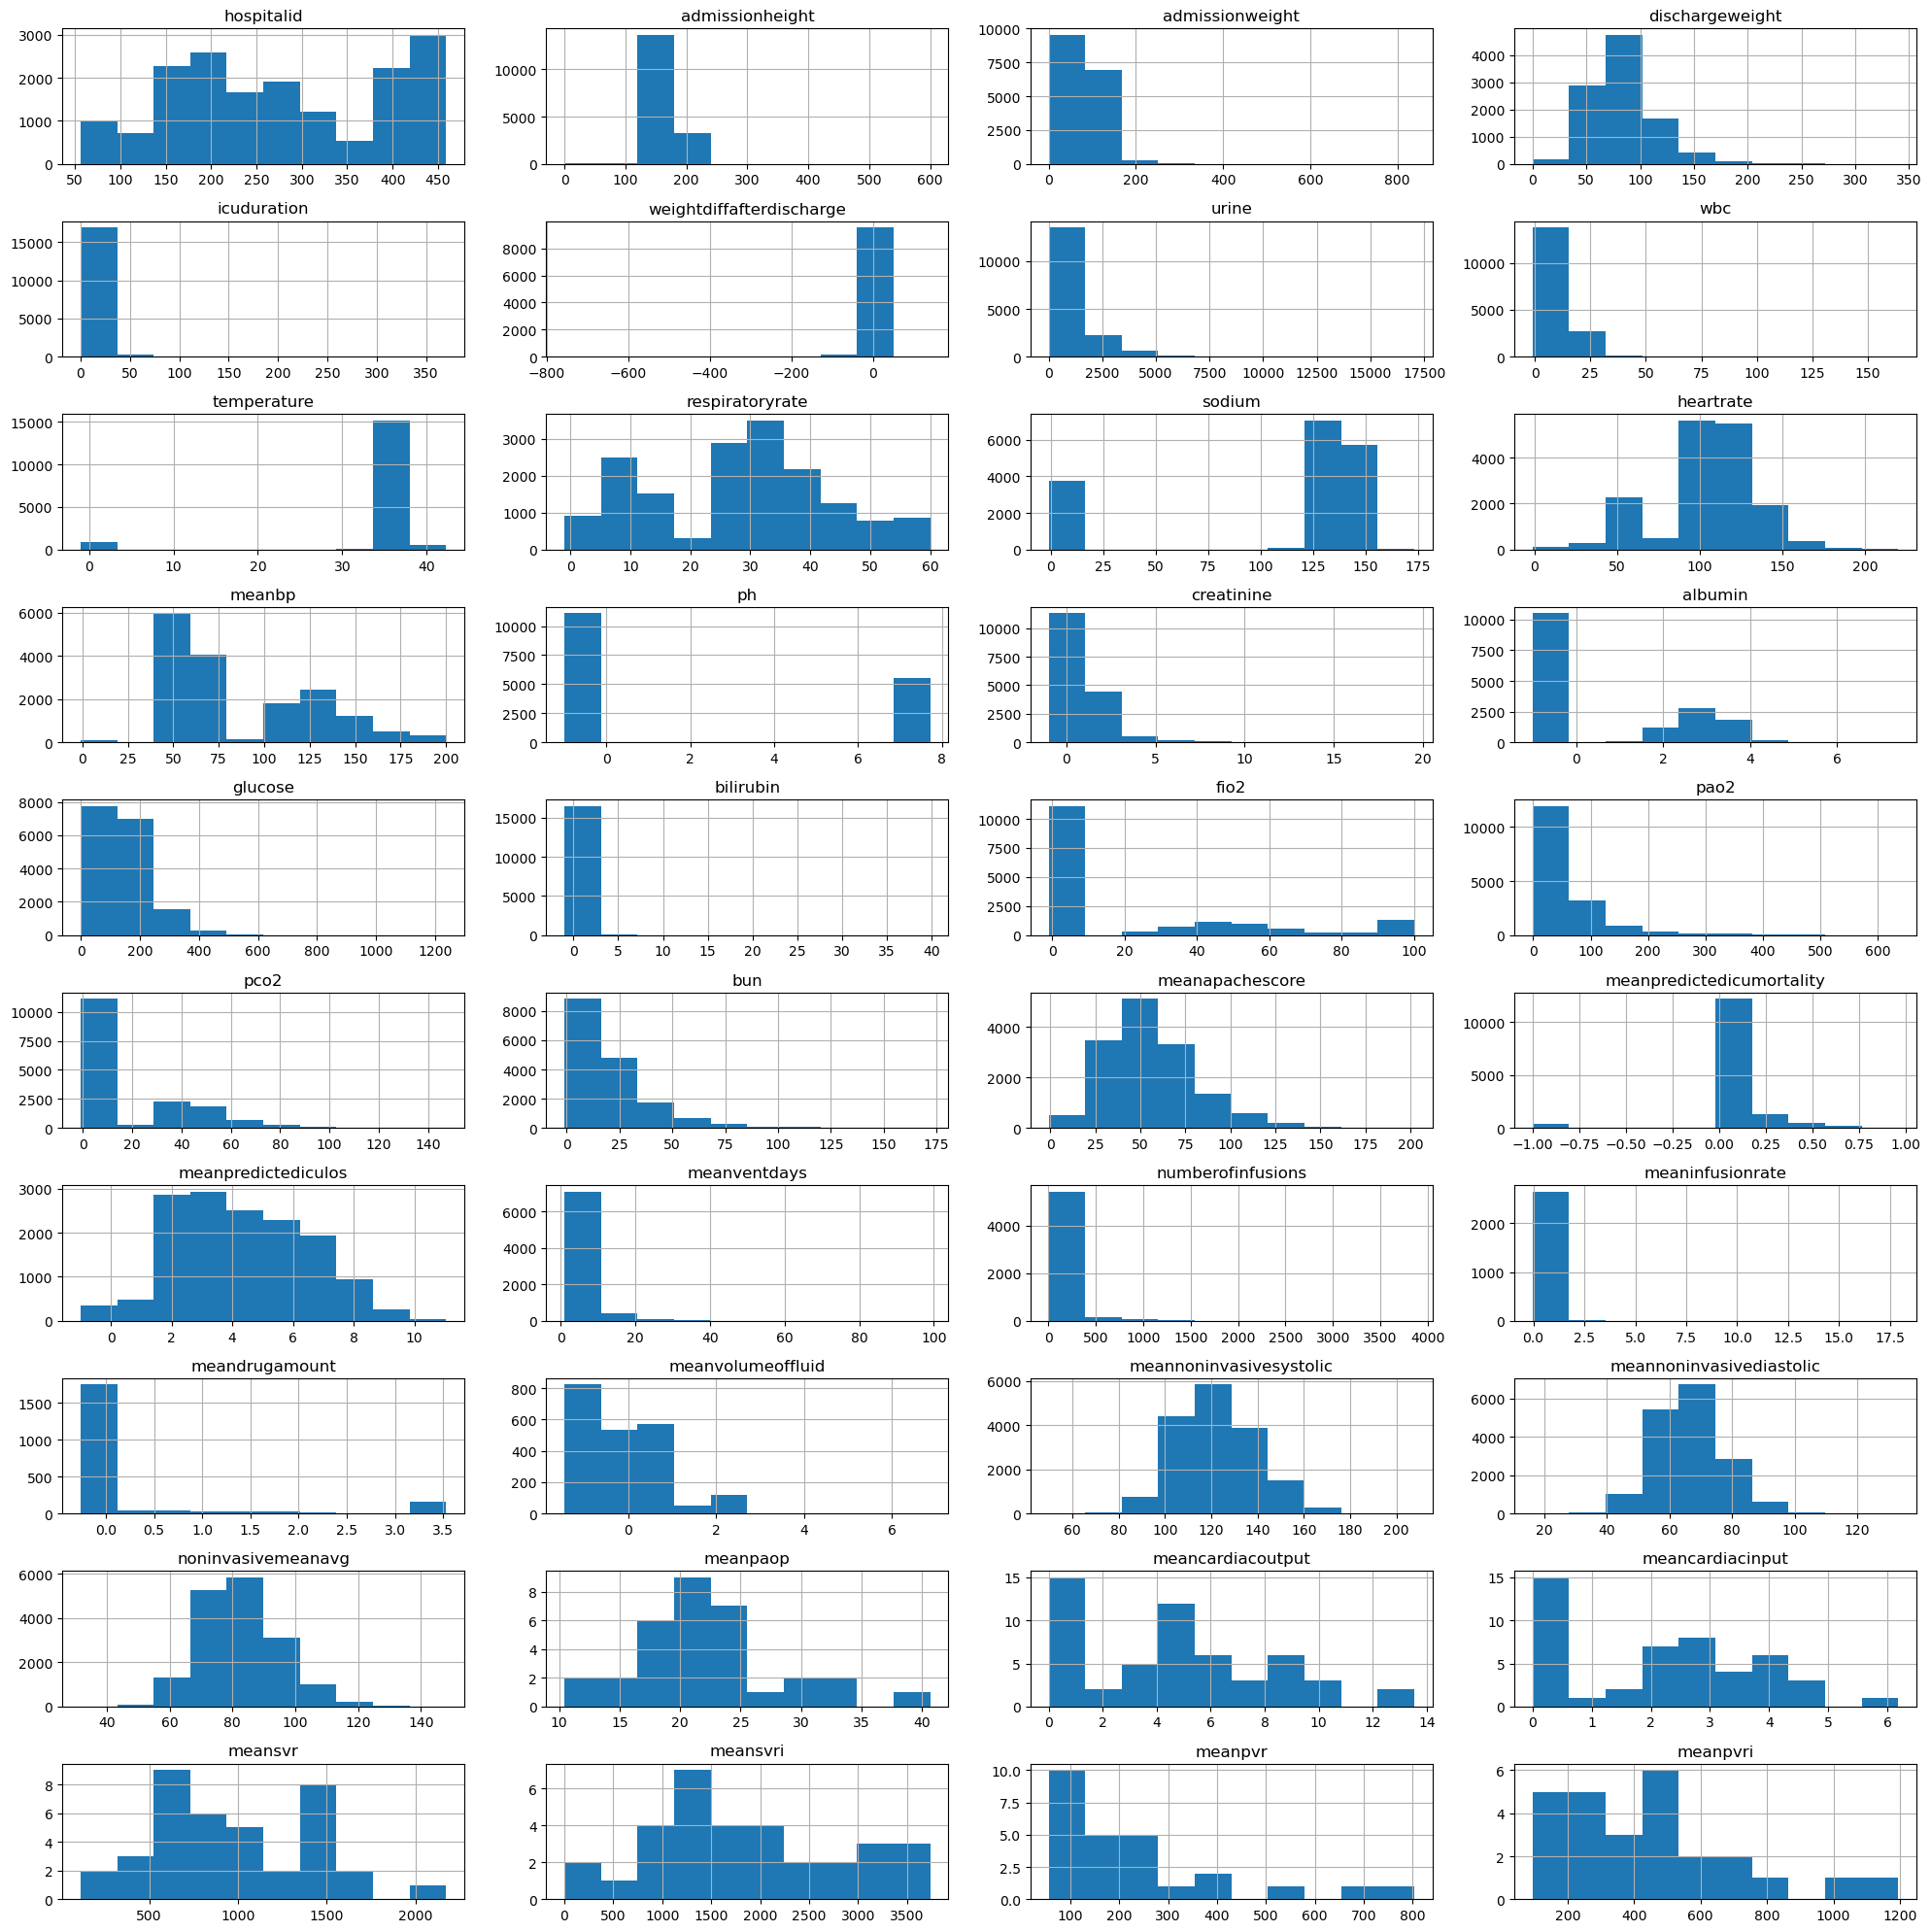

In [5]:
# Define function to draw histograms of variable distributions
def draw_histograms(df, variables, n_rows, n_cols):
    """
    This function draw histograms of each variable.
    
    :param df: data
    :type df: pandas dataframe
    :param variables: variables
    :type variables: list
    :param n_rows: number of rows for grid of plots
    :type n_rows: int
    :param n_cols: number of columns for grid of plots
    :type n_cols: int
    
    :return: grid of histogram plots for each variable
    """
    fig=plt.figure()
    for i, var_name in enumerate(variables): 
        ax=fig.add_subplot(n_rows, n_cols, i+1)
        df[var_name].hist(ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()
    
plt.rcParams['figure.figsize'] = [20, 20]
draw_histograms(patient_num_vars, patient_num_vars.columns, 10, 4)

In [6]:
pd.set_option('display.max_columns', None)
patient_num_vars.describe()

,hospitalid,admissionheight,admissionweight,dischargeweight,icuduration,weightdiffafterdischarge,urine,wbc,temperature,respiratoryrate,sodium,heartrate,meanbp,ph,creatinine,albumin,glucose,bilirubin,fio2,pao2,pco2,bun,meanapachescore,meanpredictedicumortality,meanpredictediculos,meanventdays,numberofinfusions,meaninfusionrate,meandrugamount,meanvolumeoffluid,meannoninvasivesystolic,meannoninvasivediastolic,noninvasivemeanavg,meanpaop,meancardiacoutput,meancardiacinput,meansvr,meansvri,meanpvr,meanpvri
count,17167.000000,16914.000000,16777.000000,9991.000000,17167.000000,9708.000000,16656.000000,16656.000000,16656.000000,16656.000000,16656.000000,16656.000000,16656.000000,16656.000000,16656.000000,16656.000000,16656.000000,16656.000000,16656.000000,16656.000000,16656.000000,16656.000000,14611.000000,14611.000000,14611.000000,7587.000000,5699.000000,2661.000000,2097.000000,2097.000000,16813.000000,16813.000000,16814.000000,32.000000,54.000000,47.000000,38.000000,32.000000,26.000000,26.000000
mean,276.767170,168.438364,84.759627,84.257910,8.816506,-1.121805,862.797567,8.805526,34.395799,28.230259,106.512992,104.538965,86.170347,1.791024,0.809288,0.423781,141.955367,-0.366978,19.273943,38.819975,15.604623,19.553122,55.636301,0.061843,4.289532,4.063266,87.409546,0.029366,0.189764,0.003981,122.315245,66.530057,82.416366,22.059168,4.604832,2.100114,976.426072,1857.647109,231.660672,441.961075
std,116.124939,13.970985,31.324096,30.223758,10.046396,16.477694,1315.436835,8.754981,8.693059,14.707892,58.204964,29.508599,41.112144,3.942301,1.559317,1.901715,95.672316,1.332129,32.238220,73.089378,25.321896,20.195906,25.173709,0.212967,2.192518,4.668325,204.325474,0.616283,1.055450,0.924886,17.165780,10.784989,12.439817,6.237087,3.675200,1.701225,452.569069,993.826334,189.924079,272.381124
min,56.000000,0.000000,0.000000,0.000000,0.000694,-756.200000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-0.036832,-0.262730,-1.450793,49.769231,16.280000,31.615385,10.454545,0.000000,0.000000,113.300000,3.000000,55.200000,94.600000
25%,183.000000,160.000000,64.400000,64.200000,3.656597,-2.220000,-1.000000,-1.000000,36.100000,13.000000,128.000000,94.000000,54.000000,-1.000000,0.400000,-1.000000,90.000000,-1.000000,-1.000000,-1.000000,-1.000000,6.000000,38.000000,0.013451,2.594999,2.000000,7.000000,-0.032067,-0.254393,-0.626837,110.057143,59.250000,73.662047,17.789583,0.000000,0.000000,626.500000,1183.847222,102.200000,247.553571
50%,264.000000,168.000000,79.380000,79.800000,6.289583,0.000000,113.745600,8.500000,36.500000,30.000000,136.000000,108.000000,67.000000,-1.000000,0.770000,-1.000000,132.000000,-1.000000,-1.000000,-1.000000,-1.000000,15.000000,52.000000,0.034765,4.148490,3.000000,23.000000,-0.025966,-0.226951,-0.267444,120.920000,65.880952,81.328528,21.125000,4.880385,2.279231,914.916667,1659.500000,179.222222,404.777778
75%,400.000000,177.800000,99.000000,99.000000,10.804861,2.400000,1357.689600,13.400000,36.770000,38.000000,140.000000,122.000000,122.000000,7.301000,1.220000,2.600000,189.000000,0.400000,40.000000,70.000000,37.825000,27.000000,69.000000,0.097153,5.976981,5.000000,72.000000,-0.009912,-0.126212,0.621581,133.646341,73.136364,90.208198,25.249216,6.861875,3.435963,1403.439310,2548.961538,254.782609,535.750000
max,459.000000,600.000000,838.000000,340.000000,370.265278,139.700000,17033.414400,163.700000,42.300000,60.000000,173.000000,220.000000,200.000000,7.715000,19.500000,7.400000,1237.000000,39.870000,100.000000,636.000000,147.300000,172.000000,202.000000,0.960686,11.037251,99.000000,3857.000000,17.896332,3.529607,6.863670,207.600000,133.076923,148.019231,40.666667,13.525789,6.182000,2171.521739,3734.869565,803.250000,1194.500000


There are several variables related to the APACHE score that have a minimum value of -1. We assume that these values are missing so we will recode these as null.

In [7]:
cols_to_recode = ['urine', 'wbc', 'temperature', 'respiratoryrate', 'sodium',
                  'heartrate', 'meanbp', 'ph', 'creatinine', 'albumin', 
                  'glucose', 'bilirubin', 'fio2', 'pao2', 'pco2', 'bun', 
                  'meanapachescore', 'meanpredictedicumortality', 
                  'meanpredictediculos']

for col in cols_to_recode: 
    patient.loc[patient[col] == -1, col] = np.nan

### Distribution of categorical features

In [8]:
# Define function to get categorical percentages for categorical variables
def get_categorical_percentages(df):
    """
    This function computes the percentages of categories for each categorical
    variable in the data.
    
    :param df: data
    :type df: pandas dataframe
    
    :return: prints each variable with their categories and respective 
    proportions
    """
    cat_df = df.select_dtypes(include='category')
    for var in cat_df.columns:
        perc = df[var].value_counts(normalize=True)
        print(var)
        print(perc)

In [9]:
# Recode age, teaching status and gender variables
patient['agecategory>89'] = np.where(patient.age == '> 89', 1, 0)
patient['agecategory>89'] = patient['agecategory>89'].astype('category')
patient.drop(columns='age', inplace=True)

patient.teachingstatus = np.where(patient.teachingstatus == 't', 1, 0)
patient.teachingstatus = patient.teachingstatus.astype('category')

patient['gendermale'] = np.nan
patient.loc[patient.gender == 'Male', 'gendermale'] = 1
patient.loc[patient.gender == 'Female', 'gendermale'] = 0
patient.gendermale = patient.gendermale.astype('category')
patient.drop(columns='gender', inplace=True)

In [10]:
get_categorical_percentages(patient)

ethnicity
Caucasian           0.779845
African American    0.120385
Other/Unknown       0.041645
Hispanic            0.037096
Asian               0.015122
Native American     0.005907
Name: ethnicity, dtype: float64
apacheadmissiondx
Pneumonia, bacterial                                                                       0.165958
Emphysema/bronchitis                                                                       0.147492
Arrest, respiratory (without cardiac arrest)                                               0.097629
Embolus, pulmonary                                                                         0.081202
Respiratory - medical, other                                                               0.077824
Obstruction-airway (i.e., acute epiglottitis, post-extubation edema, foreign body, etc)    0.042582
Pneumonia, other                                                                           0.039553
Pneumonia, aspiration                                             

There are a few features with highly skewed distributions towards one category over the other (99% vs 1%) including `aids` and `lymphoma`. We will drop these features,`apacheadmissiondx` given that there are a lot of categories for this feature, and `unitstaytype` since it is similar to the `hospitaladmitsource` variable.

In [11]:
patient.drop(columns=['aids', 'lymphoma', 'apacheadmissiondx', 'unitstaytype'], 
             inplace=True)

In [12]:
# One hot encode categorical variables
categorical_df = patient.select_dtypes(include='category')
cols_to_encode = [col for col in categorical_df.columns 
                  if categorical_df[col].nunique() > 2]

ind_vars = pd.get_dummies(categorical_df.loc[:, cols_to_encode])
ind_vars = ind_vars.apply(lambda x: x.astype("category"))
patient.drop(columns=cols_to_encode, inplace=True)
patient = pd.concat([patient, ind_vars], axis=1)

### Visualize numeric variables by target

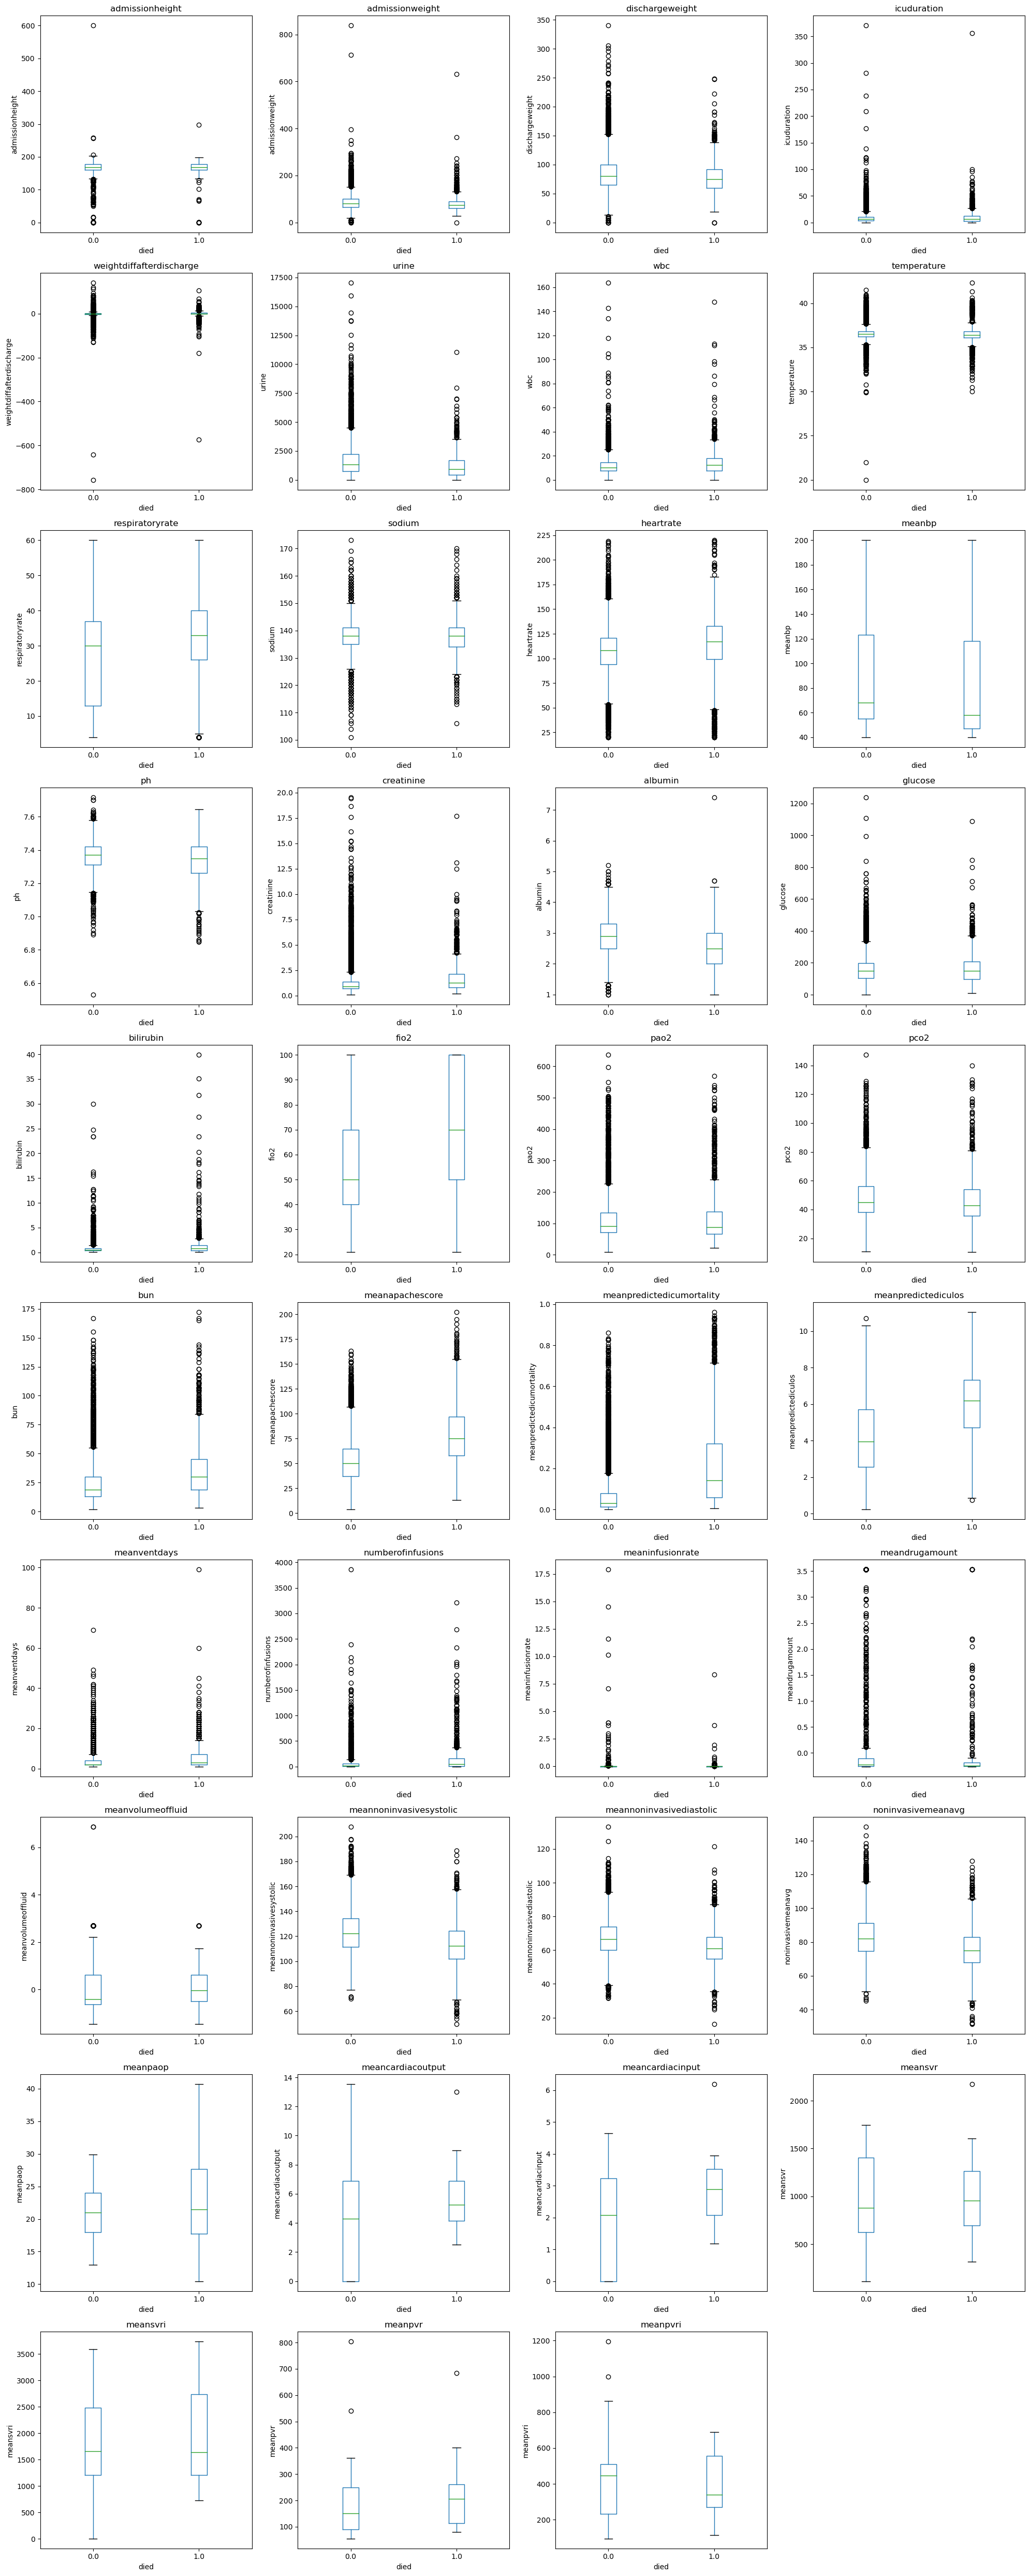

In [13]:
num_df = patient.select_dtypes(include=np.number)
num_vars_to_exclude = ['patientunitstayid', 'patienthealthsystemstayid', 
                       'wardid', 'hospitalid']
num_cols_to_keep = [col for col in num_df.columns if 
                    col not in(num_vars_to_exclude)]
num_df = num_df.loc[:, num_cols_to_keep]
num_df['died'] = patient['died']

fig=plt.figure(figsize=(20,50))
variables = num_df.columns.drop('died')
for i, var in enumerate(variables):
    ax=fig.add_subplot(10, 4, i+1)
    ax=plt.gca()
    num_df.boxplot(column=var,
                   by='died', 
                   grid=False, 
                   ax=ax)
    ax.set(ylabel=var)
    ax.set_title(var)
fig.suptitle('')
fig.tight_layout()
plt.show()

In terms of mortality of ICU patients with respiratory complications, fraction of inspired oxygen (`fio2`), the mean APACHE score (`meanapachescore`), and mean predicted length of stay (`meanpredictediculos`) seem to differentiate the alive and deceased patients pretty well.

### Distribution of categorical variables by target

In [14]:
# Get proportions of target for each categorical variable
categorical_df = patient.select_dtypes(include='category')
variables = categorical_df.columns.drop('died')  
for var in variables:
    print(pd.crosstab(categorical_df[var], 
                      categorical_df['died'], 
                      normalize='columns'), "\n")

died            0.0       1.0
intubated                    
0.0        0.836916  0.671366
1.0        0.163084  0.328634 

died       0.0       1.0
vent                    
0.0   0.622036  0.418571
1.0   0.377964  0.581429 

died           0.0       1.0
dialysis                    
0.0       0.973929  0.976179
1.0       0.026071  0.023821 

died                    0.0       1.0
immunosuppression                    
0.0                0.962141  0.939232
1.0                0.037859  0.060768 

died           0.0       1.0
diabetes                    
0.0       0.807447  0.824016
1.0       0.192553  0.175984 

died                 0.0      1.0
teachingstatus                   
0               0.751829  0.73659
1               0.248171  0.26341 

died                 0.0       1.0
agecategory>89                    
0               0.970203  0.933908
1               0.029797  0.066092 

died             0.0       1.0
gendermale                    
0.0         0.495637  0.483238
1.0         0

There seems to be a significant difference in the proportion of patients who died between the categories of all categorical variables except gender.

### Mortality by discharge time

In [15]:
patient.hospitaldischargetime24 = pd.to_datetime(patient.hospitaladmittime24, format='%H:%M:%S')
patient['hospitaldischargetimehr'] = patient.hospitaldischargetime24.dt.hour

In [16]:
temp = patient.copy()
temp['died'] = pd.to_numeric(temp['died'], errors='coerce')

discharge_hour_mortality = (
    temp.groupby('hospitaldischargetimehr')
        .agg(total=pd.NamedAgg(column='died', aggfunc='count'), 
             mortalitycount=pd.NamedAgg(column='died', aggfunc='sum'))
)
discharge_hour_mortality = (
    discharge_hour_mortality.assign(
        mortalityrate=(discharge_hour_mortality['mortalitycount'] / 
                       discharge_hour_mortality['total'])
    )
)
discharge_hour_mortality = discharge_hour_mortality.reset_index()

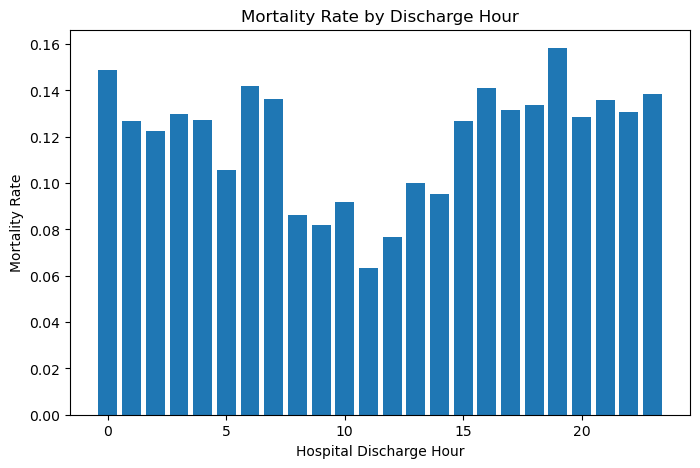

In [17]:
fig = plt.figure(figsize = (8, 5))
plt.bar(discharge_hour_mortality.hospitaldischargetimehr, 
        discharge_hour_mortality.mortalityrate)
plt.xlabel('Hospital Discharge Hour')
plt.ylabel('Mortality Rate')
plt.title('Mortality Rate by Discharge Hour')
plt.show()

In [18]:
pd.set_option('display.max_columns', None)
patient.head()

,patientunitstayid,patienthealthsystemstayid,hospitalid,wardid,admissionheight,hospitaladmittime24,hospitaldischargetime24,unitadmittime24,admissionweight,dischargeweight,unitdischargetime24,uniquepid,icuduration,died,weightdiffafterdischarge,intubated,vent,dialysis,urine,wbc,temperature,respiratoryrate,sodium,heartrate,meanbp,ph,creatinine,albumin,glucose,bilirubin,fio2,pao2,pco2,bun,meanapachescore,meanpredictedicumortality,meanpredictediculos,meanventdays,immunosuppression,diabetes,teachingstatus,numberofinfusions,meaninfusionrate,meandrugamount,meanvolumeoffluid,meannoninvasivesystolic,meannoninvasivediastolic,noninvasivemeanavg,meanpaop,meancardiacoutput,meancardiacinput,meansvr,meansvri,meanpvr,meanpvri,agecategory>89,gendermale,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,hospitaladmitsource_Acute Care/Floor,hospitaladmitsource_Chest Pain Center,hospitaladmitsource_Direct Admit,hospitaladmitsource_Emergency Department,hospitaladmitsource_Floor,hospitaladmitsource_ICU,hospitaladmitsource_ICU to SDU,hospitaladmitsource_Observation,hospitaladmitsource_Operating Room,hospitaladmitsource_Other,hospitaladmitsource_Other Hospital,hospitaladmitsource_Other ICU,hospitaladmitsource_PACU,hospitaladmitsource_Recovery Room,hospitaladmitsource_Step-Down Unit (SDU),unittype_CCU-CTICU,unittype_CSICU,unittype_CTICU,unittype_Cardiac ICU,unittype_MICU,unittype_Med-Surg ICU,unittype_Neuro ICU,unittype_SICU,unitadmitsource_Acute Care/Floor,unitadmitsource_Chest Pain Center,unitadmitsource_Direct Admit,unitadmitsource_Emergency Department,unitadmitsource_Floor,unitadmitsource_ICU,unitadmitsource_ICU to SDU,unitadmitsource_Observation,unitadmitsource_Operating Room,unitadmitsource_Other,unitadmitsource_Other Hospital,unitadmitsource_Other ICU,unitadmitsource_PACU,unitadmitsource_Recovery Room,unitadmitsource_Step-Down Unit (SDU),numbedscategory_100 - 249,numbedscategory_250 - 499,numbedscategory_<100,numbedscategory_>= 500,hospitalregion_Midwest,hospitalregion_Northeast,hospitalregion_South,hospitalregion_West,hospitaldischargetimehr
0,141203,128948,66,90,160.0,22:23:00,1900-01-01 22:23:00,20:39:00,70.2,70.3,03:48:00,002-23234,3.749306,0.0,0.1,0.0,1.0,0.0,NaN,12.7,35.1,33.0,145.0,120.0,46.0,7.45,0.56,NaN,145.0,NaN,100.0,51.0,37.0,9.0,90.0,0.305696,8.078793,2.0,0.0,1.0,0,NaN,NaN,NaN,NaN,103.371069,57.333333,74.356250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,22
1,141276,129009,63,95,165.1,14:43:00,1900-01-01 14:43:00,14:44:00,156.6,156.6,18:48:00,002-9090,1.192361,0.0,0.0,1.0,0.0,0.0,NaN,5.9,35.0,53.0,135.0,133.0,138.0,7.42,0.78,NaN,197.0,NaN,100.0,370.0,43.0,18.0,55.0,0.054073,5.307389,1.0,0.0,1.0,0,NaN,NaN,NaN,NaN,138.500000,71.875000,97.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,14
2,141337,129059,71,113,154.9,20:27:12,1900-01-01 20:27:12,20:34:00,67.8,68.5,15:40:00,002-48469,1.899306,0.0,0.7,0.0,0.0,0.0,NaN,NaN,36.8,15.0,NaN,101.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,0.002486,0.588767,NaN,1.0,0.0,0,NaN,NaN,NaN,NaN,122.411765,61.588235,85.294118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,20
3,141436,129143,73,92,167.6,04:13:00,1900-01-01 04:13:00,04:13:00,72.6,65.9,16:20:00,002-75273,4.511806,0.0,-6.7,1.0,1.0,0.0,NaN,9.7,36.4,34.0,132.0,114.0,113.0,7.35,1.00,NaN,143.0,NaN,40.0,141.0,47.0,15.0,56.0,0.066769,5.681211,2.0,0.0,0.0,1,NaN,NaN,NaN,NaN,118.750000,69.875000,86.075000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,4
4,141596,129269,63,95,172.7,19:18:58,1900-01-01 19:18:58,19:26:00,82.2,84.4,13:00:00,002-35605,6.006250,0.0,2.2,0.0,0.0,0.0,NaN,NaN,36.4,39.0,NaN,63.

In [19]:
# Create indicator variable that indicates the timespan covering the drop
# in mortality rate from hours 8 to 14.
patient['dischargehour8-14'] = (
    np.where((patient.hospitaldischargetimehr >= 8) & 
             (patient.hospitaldischargetimehr <= 14), 1, 0)
)

patient.drop(columns=['hospitaladmittime24', 'hospitaldischargetime24', 
                      'unitadmittime24', 'unitdischargetime24', 
                      'hospitaldischargetimehr'], inplace=True)

### Check for missing values

We will exclude any columns with more than 50% missing values and impute the other columns that do not exceed this threshold. However, we will first remove all patients who have a missing discharge status.

In [20]:
patient.died.isna().sum()

178

In [21]:
patient.dropna(subset='died', inplace=True)
patient.shape

(16989, 106)

In [22]:
missing_val_count = patient.isna().sum()
missing_df = pd.DataFrame(data={'variable': patient.columns, 
                                'missing_val_count': missing_val_count.values})
missing_df['missing_val%'] = (
    100 * (missing_df['missing_val_count'] / patient.shape[0])
)

# Get columns with more than 50% missing data
cols_to_drop = (
    missing_df.loc[missing_df['missing_val%'] >= 50, 'variable'].tolist()
)

patient.drop(columns=cols_to_drop, inplace=True)

In [23]:
# Remove irrelevant columns
patient.drop(columns=['patientunitstayid', 'patienthealthsystemstayid', 
                      'wardid', 'uniquepid'], 
             inplace=True)

We will impute the numeric variables with the median and categorical variable with the most frequent label. Before doing so, we will first split the data into training and testing to avoid data leakage.

### Train-Test Split

We will randomize our train and test sets by `hospitalid` and test models on how well they generalize on predicting mortality of respiratory ICU patients on hospitals that were not trained on.

In [24]:
import random

random.seed(670)

# Randomly select 140 hospitals for the training set
hospital_ids = patient.hospitalid.unique().tolist()
train_ids = random.sample(hospital_ids, 140)

train = patient.copy()
test = patient.copy()

train = train.loc[patient.hospitalid.isin(train_ids), :]
test = test.loc[~(patient.hospitalid.isin(train_ids)), :]

train.drop(columns='hospitalid', inplace=True)
test.drop(columns='hospitalid', inplace=True)

print(train.shape)
print(test.shape)

(11753, 83)
(5236, 83)


### Impute missing values

In [26]:
# Impute numeric variables with median
numeric_vars = train.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='median')
imputer = imputer.fit(train[numeric_vars])
train[numeric_vars] = imputer.transform(train[numeric_vars])
test[numeric_vars] = imputer.transform(test[numeric_vars])

In [27]:
# Impute categorical variables with most frequent label
categorical_vars = train.select_dtypes(include='category').columns
imputer = SimpleImputer(strategy='most_frequent')
imputer = imputer.fit(train[categorical_vars])
train[categorical_vars] = imputer.transform(train[categorical_vars])
test[categorical_vars] = imputer.transform(test[categorical_vars])

In [28]:
train.isna().sum().sum()

0

In [29]:
test.isna().sum().sum()

0

In [31]:
print(train.shape)
print(test.shape)

# Save training and test datasets to csv 
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

(11753, 83)
(5236, 83)
